In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class State:
    playerSum = random.randint(1,10)
    dealerSum = random.randint(1,10)

# adds the card values
def totalSum(total):
    total += random.randint(1,10)
    return total

# returns action to be taken : 0 for stand or 1 for hit}
def step(state, action):
    if action == 0:    
        # Stand, Let the dealer play till its total is less than 17
        while(state.dealerSum < 17):
            state.dealerSum = totalSum(state.dealerSum)
            if state.dealerSum > 21:
                return "EndGame", 1.0
        if state.dealerSum < state.playerSum:
            return "EndGame", 1.0
        elif state.dealerSum > state.playerSum:
            return "EndGame", -1000.0
        else:
            return "EndGame", 0.0
    elif action == 1:
        state.playerSum = totalSum(state.playerSum)
        if state.playerSum > 21:
            return "EndGame", -1000.0
        else:
            return state, 0
        
def epsilonGreedy(epsilon,track,state,tdValue):
    if (random.random() < epsilon):
        action = random.randint(0,1)
    else:
        action = np.argmax(tdValue[:, state.dealerSum, state.playerSum])
    return action
        
        
def trainQ(epsilon,tdValue,track,player_sum, alpha):
    state = State()
    state.playerSum = random.randint(1,10)
    state.dealerSum = random.randint(1,10)    
    oldaction= None
    oldDealerSum = None
    oldPlayerSum = None
    count=0
    while state != "EndGame":
        epsilon = 100.0 / (100.0 + np.sum(track[:,state.dealerSum, state.playerSum],axis=0))
        action = epsilonGreedy(epsilon,track,state,tdValue)
        track[action, state.dealerSum, state.playerSum] += 1
        if oldaction is not None:
            # Compute Q value
            tdValue[oldaction,oldDealerSum,oldPlayerSum] = tdValue[oldaction,oldDealerSum,oldPlayerSum] + alpha*(reward + tdValue[action,state.dealerSum,state.playerSum] - tdValue[oldaction,oldDealerSum,oldPlayerSum])
        oldDealerSum = state.dealerSum
        oldPlayerSum = state.playerSum
        state, reward = step(state, action)
        oldaction = action
        if state == "EndGame": 
            player_sum.append(oldPlayerSum)
            # Compute Q value when player stands
            tdValue[oldaction,oldDealerSum,oldPlayerSum] = tdValue[oldaction,oldDealerSum,oldPlayerSum] + alpha*(reward - tdValue[oldaction,oldDealerSum,oldPlayerSum])
    return tdValue, track, reward, player_sum, alpha, epsilon        
def plotQ():
    testcase = None
    track = np.zeros((2,11,22))
    tdValue = np.zeros((2,11,22))  
    tdValue[:,:,:]=-1
    epsilon=1000
    epsilonDecayFactor=0.1
    alpha=0.1
    count=0
    winVector=[]
    countVector=[]
    player_sum=[]
    ps=[]
    ps.append(0)
    winVector.append(0)
    nEpisodes=[x*1000 for x in range(500)]
    for i in range(500000):
        tdValue, track, reward, player_sum, alpha, epsilon = trainQ(epsilon,tdValue,track,player_sum, alpha)
        alpha = alpha*math.pow(0.667, i)
        epsilon = epsilon*math.pow(epsilonDecayFactor, i)
        if reward==1:
            count+=1;
            countVector.append(count)
        if i%1000==0 and i!=0:
            # Average over 1000 games
            ps.append(np.sum(player_sum)/1000)
            player_sum=[]
            winVector.append(count/1000)  
            count=0
    #xEpisodes=[x for x in range(len(countVector))]
    plt.figure(1)
    plt.plot(nEpisodes,winVector)
    plt.xlabel("Total Epochs")
    plt.ylabel("Win (%)")
    plt.title("Win Rate vs Time")
    plt.figure(2)
    plt.plot(nEpisodes,ps)
    plt.xlabel("Total Games Played")
    plt.ylabel("Player Sum during Stand")
    plt.title("Player Sum Stand Averaged over 1000 games")
    testcase = tdValue
    fig = plt.figure()
    ha = fig.add_subplot(111, projection='3d')
    x = range(21)
    y = range(10)
    X, Y = np.meshgrid(x,y)
    bestValue = np.amax(testcase,axis=0)
    ha.plot_surface(Y+1, X+1, bestValue[1:,1:],cmap='inferno',edgecolor='none')
    ha.set_xlabel("Dealer showing")
    ha.set_ylabel("Player sum")   
    ha.set_zlabel("State value")
    #print (len(countVector), len(winVector))
    plt.show()

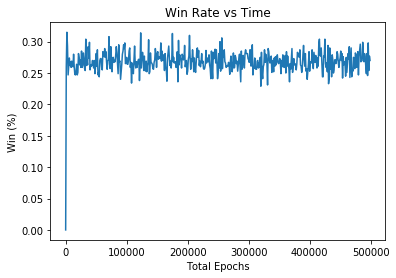

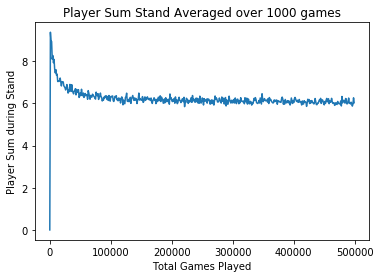

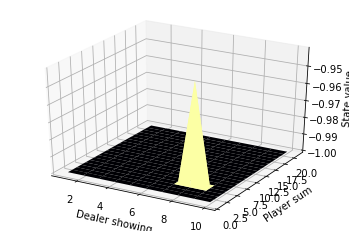

In [3]:
plotQ()